ORTHOPEDIC CLASSIFICATION


In [55]:
#Predictive Modeling for Enhanced Orthopedic Outcomes

In [56]:
import pandas as pd 
import numpy as np


In [57]:
data = pd.read_csv(r"C:\Users\neela\OneDrive\data\orthopedic dataset.csv")


In [58]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
1175,74.088795,9.433234,52.585800,19.195300,134.711772,29.106575,Abnormal
1176,63.811232,21.380645,87.163863,16.158201,114.818751,26.931841,Abnormal
1177,68.384311,21.936186,61.089501,29.237841,123.932010,10.431972,Abnormal
1178,70.317179,41.286305,110.677897,14.702656,115.012334,26.588100,Abnormal


In [59]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [60]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [61]:
data.duplicated().value_counts()

False    1180
Name: count, dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          1180 non-null   float64
 1   pelvic_tilt numeric       1180 non-null   float64
 2   lumbar_lordosis_angle     1180 non-null   float64
 3   sacral_slope              1180 non-null   float64
 4   pelvic_radius             1180 non-null   float64
 5   degree_spondylolisthesis  1180 non-null   float64
 6   class                     1180 non-null   object 
dtypes: float64(6), object(1)
memory usage: 64.7+ KB


In [63]:
##Splitting data

In [64]:
x_data=data.drop(['class'],axis=1)
y_data=data['class']


In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state=42)
import os
output_directory = "data"
os.makedirs(output_directory, exist_ok=True)
x_train.to_csv(os.path.join(output_directory, "x_train.csv"), index=False)
x_test.to_csv(os.path.join(output_directory, "x_test.csv"), index=False)
y_train.to_csv(os.path.join(output_directory, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(output_directory, "y_test.csv"), index=False)

In [66]:
##Seperateing numerical and categorical columns

In [67]:
numeric_columns = data.select_dtypes(exclude=['object'])
categorical_columns = data.select_dtypes(include=['object'])

In [68]:
numeric_columns

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
1175,74.088795,9.433234,52.585800,19.195300,134.711772,29.106575
1176,63.811232,21.380645,87.163863,16.158201,114.818751,26.931841
1177,68.384311,21.936186,61.089501,29.237841,123.932010,10.431972
1178,70.317179,41.286305,110.677897,14.702656,115.012334,26.588100


In [69]:
categorical_columns 

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal
...,...
1175,Abnormal
1176,Abnormal
1177,Abnormal
1178,Abnormal


In [70]:
##Encoding categorical data

In [71]:
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load

label_encoder = LabelEncoder()
data["class_encoded"] = label_encoder.fit_transform(data["class"])
output_directory = 'models/encoder/'
os.makedirs(output_directory, exist_ok=True)
encoder_file_path = os.path.join(output_directory, 'label_encoder.pkl')
dump(label_encoder, encoder_file_path)


['models/encoder/label_encoder.pkl']

In [72]:
loaded_encoder = load('models/encoder/label_encoder_.pkl')


In [73]:
transform = loaded_encoder.transform(np.ravel(categorical_columns))
encode_categories = pd.DataFrame(transform, columns=["class_encoded"])
encode_categories


,class_encoded
0,0
1,0
2,0
3,0
4,0
...,...
1175,0
1176,0
1177,0
1178,0


In [74]:
##Scaling Numerical data

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)

In [76]:
numerical_scaler=scaler.fit(numeric_columns)

In [77]:
output_directory = 'models/scaler/'
os.makedirs(output_directory, exist_ok=True)
dump(numerical_scaler, os.path.join(output_directory, 'MinMax_scaler.pkl'))

['models/scaler/MinMax_scaler.pkl']

In [78]:
loaded_scaler = load('models/scaler/MinMax_scaler.pkl')


In [79]:
scaled_data = loaded_scaler.transform(numeric_columns)
feature_normalized = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

In [80]:
feature_normalized

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173
...,...,...,...,...,...,...
1175,0.462365,0.285571,0.345310,0.053935,0.695024,0.093493
1176,0.363244,0.498967,0.654755,0.025830,0.481094,0.088431
1177,0.407349,0.508890,0.421411,0.146868,0.579098,0.050023
1178,0.425990,0.854509,0.865186,0.012361,0.483176,0.087631


In [81]:
##connect numerical and categorical data

In [82]:
predictive_features=pd.concat([feature_normalized,encode_categories],axis=1)

In [83]:
predictive_features

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_encoded
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0
...,...,...,...,...,...,...,...
1175,0.462365,0.285571,0.345310,0.053935,0.695024,0.093493,0
1176,0.363244,0.498967,0.654755,0.025830,0.481094,0.088431,0
1177,0.407349,0.508890,0.421411,0.146868,0.579098,0.050023,0
1178,0.425990,0.854509,0.865186,0.012361,0.483176,0.087631,0


In [84]:
print("Original Data Shapes:", predictive_features.shape, y_train.shape)

Original Data Shapes: (1180, 7) (944,)


In [85]:
print("Training Data Shapes:", x_train.shape, y_train.shape)
print("Testing Data Shapes:", x_test.shape, y_test.shape)

Training Data Shapes: (944, 6) (944,)
Testing Data Shapes: (236, 6) (236,)


In [86]:
##Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dump(dt, 'models/dt.pkl')
train_score = dt.score(x_train, y_train)
print('Train accuracy:', train_score * 100)

Train accuracy: 100.0


In [88]:
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('test Accuracy:', accuracy_dt * 100)

test Accuracy: 90.67796610169492


In [89]:
##visualization for Decision Tree Classifier

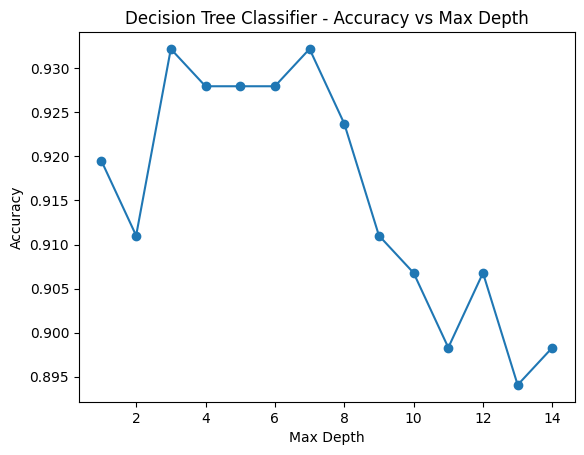

In [90]:
import matplotlib.pyplot as plt 

directory = 'models_visualization'
if not os.path.exists(directory):
    os.makedirs(directory)


score_list = []

for each in range(1, 15):
    dt_classifier = DecisionTreeClassifier(max_depth=each, random_state=42)
    dt_classifier.fit(x_train, y_train)
    dump(dt_classifier, 'models_visualization/dt.pkl')
    score_list.append(dt_classifier.score(x_test, y_test))

# Plotting
plt.plot(range(1, 15), score_list, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier - Accuracy vs Max Depth")
plt.show()

In [91]:
##RandomForestClassifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
dump(RF, 'models/RF.pkl')
train_score = RF.score(x_train, y_train)
print('RandomForestClassifier Train accuracy:', train_score * 100)

RandomForestClassifier Train accuracy: 100.0


In [93]:


y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('RandomForestClassifier test Accuracy:', accuracy * 100)




RandomForestClassifier test Accuracy: 93.22033898305084


In [94]:
##visualization for random forest classifier

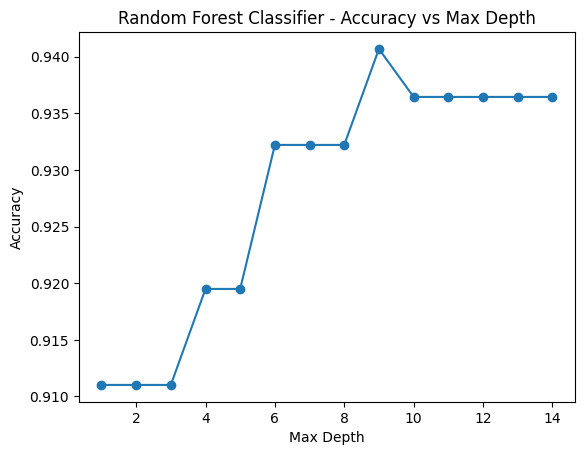

In [95]:
score_list = []

for each in range(1, 15):
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=each, random_state=42)
    rf_classifier.fit(x_train, y_train)
    dump(rf_classifier, 'models_visualization/RF.pkl')
    score_list.append(rf_classifier.score(x_test, y_test))

plt.plot(range(1, 15), score_list, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier - Accuracy vs Max Depth")
plt.show()

In [96]:
##KNeighborsClassifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
dump(knn, 'models/KNN.pkl')
train_score = knn.score(x_train, y_train)
print('KNeighborsClassifier Train accuracy:', train_score * 100)

KNeighborsClassifier Train accuracy: 93.85593220338984


In [98]:
y_pred = knn .predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('KNeighborsClassifier test Accuracy:', accuracy * 100)

KNeighborsClassifier test Accuracy: 94.0677966101695


In [99]:
##visualization for KNN classifier

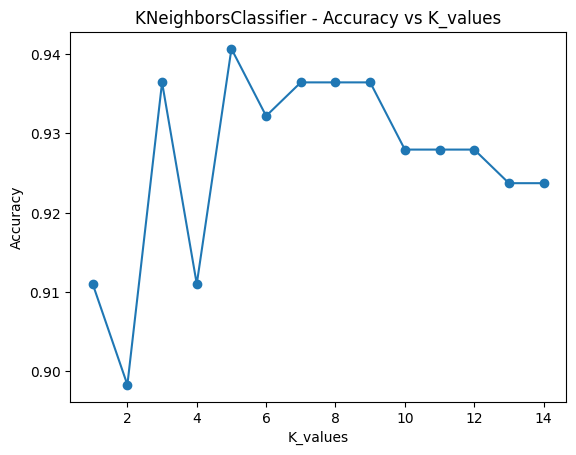

In [100]:
score_list=[]

for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    dump(knn2, 'models_visualization/KNN.pkl')
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list,marker='o')
plt.xlabel("K_values")
plt.ylabel("Accuracy")
plt.title("KNeighborsClassifier - Accuracy vs K_values")
plt.show()

In [101]:
##support vector machine classifier

In [102]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
dump(svm_classifier, 'models/SVM.pkl')
train_score = svm_classifier.score(x_train, y_train)
print('SVM Train Accuracy:', train_score * 100)

SVM Train Accuracy: 90.78389830508475


In [103]:
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('SVM Classifier test Accuracy:', accuracy * 100)



SVM Classifier test Accuracy: 91.94915254237289


In [104]:
##visualization for SVM classifier

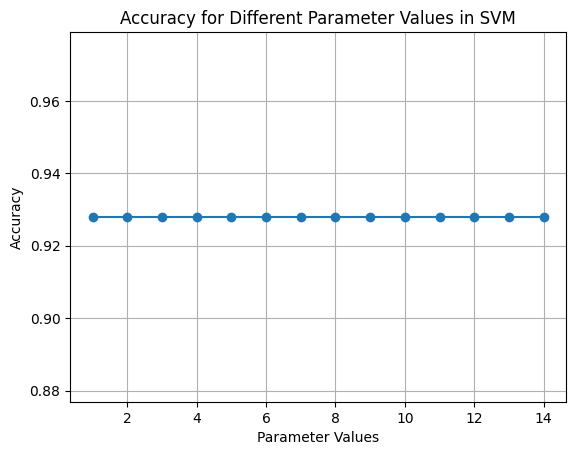

In [105]:
score_list = []

for each in range(1, 15):
    svm_classifier = SVC(C=each, kernel='linear') 
    svm_classifier.fit(x_train, y_train)
    dump(svm_classifier, 'models_visualization/SVM.pkl')
    score_list.append(svm_classifier.score(x_test, y_test))

# Line plot
plt.plot(range(1, 15), score_list, marker='o')
plt.xlabel("Parameter Values")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Parameter Values in SVM")
plt.grid(True)
plt.show()